#### *Questions 1 and 2 are also solved using SQL.* *[Go to SQL File][def]*

[def]: ./Py%20Questions%20Solved%20Using%20SQL/Queries.sql

#### 1. Write a Python function to filter customers with more than 5 purchases in the last 6 months.

In [92]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

purchases_df=pd.read_csv('./Data/electronic_sales_data.csv')
purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerName  1520 non-null   object 
 1   productName   1520 non-null   object 
 2   purchaseDate  1520 non-null   object 
 3   price         1520 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.6+ KB


In [93]:
# Changing the data type of column purchaseDate into datetime
purchases_df['purchaseDate']=pd.to_datetime(purchases_df['purchaseDate'])
purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customerName  1520 non-null   object        
 1   productName   1520 non-null   object        
 2   purchaseDate  1520 non-null   datetime64[ns]
 3   price         1520 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.6+ KB


In [94]:
def filter_customers(df, purchase_date_col, customer_col):
    # Calculating the date prior to 6 months
    six_months_ago=datetime.now()-relativedelta(months=6)

    # Changing the purchase_date_col to datetime
    df[purchase_date_col] = pd.to_datetime(df[purchase_date_col])

    recent_purchases=df[df[purchase_date_col] >= six_months_ago]
    purchase_counts=recent_purchases[customer_col].value_counts()

    #get customer with more than 5 purchases
    frequent_customers=purchase_counts[purchase_counts > 5]

    return frequent_customers

filtered_customer_df=filter_customers(df=purchases_df,
                                      purchase_date_col='purchaseDate',
                                      customer_col='customerName')
print(filtered_customer_df)


customerName
Robert Peterson    8
Barbara Maddox     8
Judith Oconnor     6
Paul Lee           6
Michael Rhodes     6
Name: count, dtype: int64


#### 2. Develop a program to read a CSV file, extract unique values from a column, and save the results in a new file.

In [95]:
pandas_df=pd.read_csv('./Data/electronic_sales_data.csv')
unique_values=pandas_df.drop_duplicates(subset=['customerName'])
print(unique_values)

             customerName        productName purchaseDate    price
0           Joyce Aguilar         Headphones    1/23/2022  1749.09
1          Michael Rhodes             Router     7/2/2024  1423.36
2          Cynthia Weaver              Drone     1/4/2024  1255.78
3            Ernest Clark         Power Bank    5/20/2023  1680.43
4            Roger Flores           Smart TV    5/26/2024  1235.64
5         William Johnson            Monitor     2/4/2022  1513.86
6            Jacob Malone         Smartwatch    10/6/2024  1534.29
7         Robert Peterson             Tablet    4/21/2022  1451.89
8          Maria Williams                SSD     7/5/2020   803.61
9          Daniel Bonilla         Smartwatch    9/28/2020   859.15
10               Paul Lee             Laptop    3/16/2023  1293.30
11            Kevin Baker         Hard Drive     3/2/2021  1144.20
13            Joshua Chan                SSD    6/23/2023    66.71
14            Mary Rhodes             Tablet    10/6/2024   62

#### 3. Create a Python script to visualize monthly sales trends using Matplotlib or Seaborn.

In [67]:
pandas_df['purchaseDate']=pd.to_datetime(pandas_df['purchaseDate'])

# Extract the Year and Month for grouping
pandas_df['YearMonth']=pandas_df['purchaseDate'].dt.to_period('M')

# Group by year and month , and calculate the total sales
monthly_sales=pandas_df.groupby('YearMonth')['price'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_sales['YearMonth']=monthly_sales['YearMonth'].dt.to_timestamp()

print(monthly_sales)

    YearMonth     price
0  2020-01-01  34756.36
1  2020-02-01  24238.14
2  2020-03-01  17515.16
3  2020-04-01  24368.79
4  2020-05-01  26449.80
5  2020-06-01  30832.14
6  2020-07-01  34688.03
7  2020-08-01  26144.82
8  2020-09-01  23710.12
9  2020-10-01  18692.65
10 2020-11-01  20159.57
11 2020-12-01  33046.97
12 2021-01-01  24691.49
13 2021-02-01  12436.21
14 2021-03-01  18584.74
15 2021-04-01  23842.10
16 2021-05-01  24027.26
17 2021-06-01  21120.13
18 2021-07-01  21055.29
19 2021-08-01  40345.50
20 2021-09-01  26748.74
21 2021-10-01  28689.77
22 2021-11-01  29040.19
23 2021-12-01  23306.23
24 2022-01-01  25047.27
25 2022-02-01  36700.40
26 2022-03-01  28447.80
27 2022-04-01  23645.57
28 2022-05-01  29206.61
29 2022-06-01  22318.85
30 2022-07-01  31225.98
31 2022-08-01  22266.35
32 2022-09-01  31471.86
33 2022-10-01  27412.66
34 2022-11-01  18332.09
35 2022-12-01  25944.20
36 2023-01-01  27085.03
37 2023-02-01  21552.27
38 2023-03-01  31987.18
39 2023-04-01  21352.82
40 2023-05-01  3

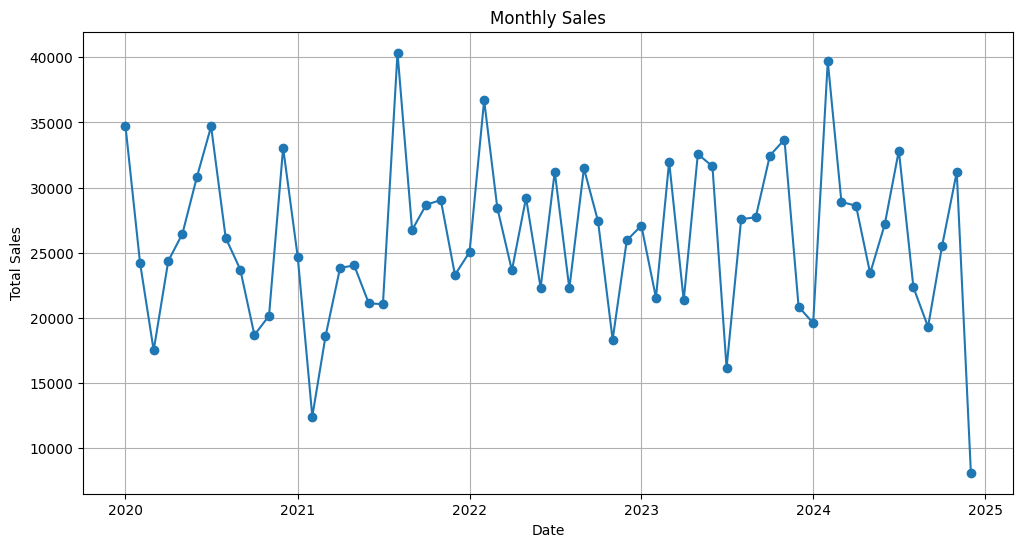

In [54]:
# Plot the monthly sales
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['price'], marker='o')
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()